In [17]:
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from keras_vggface.vggface import VGGFace
from keras_vggface import utils


In [1]:
import keras
print(keras.__version__)

2.12.0


In [18]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


In [19]:
model = VGGFace(model='vgg16')
model = VGGFace()

In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
'./dataset',
target_size=(224,224),
color_mode='rgb',
batch_size=32,
class_mode='categorical',
shuffle=True)


Found 442 images belonging to 2 classes.


In [29]:
train_generator.class_indices.values()
NO_CLASSES = len(train_generator.class_indices.values())
print(NO_CLASSES)

2


In [30]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [31]:
from keras.layers import Dense

output_layer = Dense(2, activation='softmax')(base_model.output)

model = Model(inputs=base_model.input, outputs=output_layer)
model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [32]:

# model = Model(inputs = base_model.input, outputs = preds)
# model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

for layer in model.layers[19:]:
    layer.trainable = True


In [33]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [34]:
model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)


Epoch 1/20
14/14 [==============================] - 123s 9s/step - loss: 0.6909 - accuracy: 0.5385
Epoch 2/20
14/14 [==============================] - 131s 9s/step - loss: 0.6451 - accuracy: 1.0000
Epoch 3/20
14/14 [==============================] - 118s 8s/step - loss: 0.6265 - accuracy: 1.0000
Epoch 4/20
14/14 [==============================] - 105s 8s/step - loss: 0.6105 - accuracy: 1.0000
Epoch 5/20
14/14 [==============================] - 121s 9s/step - loss: 0.5954 - accuracy: 1.0000
Epoch 6/20
14/14 [==============================] - 119s 8s/step - loss: 0.5812 - accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 117s 8s/step - loss: 0.5678 - accuracy: 1.0000
Epoch 8/20
14/14 [==============================] - 118s 8s/step - loss: 0.5550 - accuracy: 1.0000
Epoch 9/20
14/14 [==============================] - 115s 8s/step - loss: 0.5427 - accuracy: 1.0000
Epoch 10/20
14/14 [==============================] - 116s 8s/step - loss: 0.5310 - accuracy: 1.0000
Epoch 11/

In [35]:
model.save(
    'model_VGG16.h5')


In [36]:
from tensorflow.keras.models import load_model

# del model

model = load_model(
    'model_VGG16.h5')


In [37]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: 'Duck', 1: 'Hang'}


In [38]:
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)


In [39]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_vggface import utils

image_width = 224
image_height = 224

face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['Duck', 'Hang']


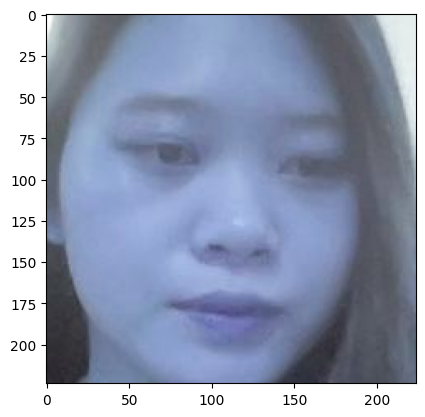

1/1 [==============================] - 0s 223ms/step
[[0.364841   0.63515896]]
1
Predicted face: Hang



In [44]:
from keras.utils import load_img, img_to_array

facecascade =  cv2.CascadeClassifier(
    'haarcascade_frontalface_default.xml')

for i in range(1,30): test_image_filename = f'./dataset/Hang/Hang_{i}.png'
# img_load=cv2.imread(test_image_filename)
imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
image_array = np.array(imgtest, "uint8")

faces = facecascade.detectMultiScale(imgtest, 
    scaleFactor=1.1, minNeighbors=5)

if len(faces) != 1: 
    print(f'---We need exactly 1 face; photo skipped---')
    print()

for (x_, y_, w, h) in faces:
    face_detect = cv2.rectangle(
        imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
    plt.imshow(face_detect)
    plt.show()

    size = (image_width, image_height)
    roi = image_array[y_: y_ + h, x_: x_ + w]
    resized_image = cv2.resize(roi, size)

    x = img_to_array(resized_image)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)

    predicted_prob = model.predict(x)
    print(predicted_prob)
    print(predicted_prob[0].argmax())
    print("Predicted face: " + class_list[predicted_prob[0].argmax()])
    print("============================\n")
